In [1]:
# Install dependencies
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [2]:
# Import necessary libraries
import ultralytics
from ultralytics import YOLO
from roboflow import Roboflow
import os
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [4]:
# Download dataset from Roboflow
rf = Roboflow(api_key="Npr82rgYiQ5A5trJBlb8")
project = rf.workspace("capstone2025-mifho").project("military-base-object-detection")
version = project.version(12)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Military-Base-Object-Detection-12 in yolov8:: 100%|██████████| 25422/25422 [00:13<00:00, 1904.83it/s]


In [5]:
# Get dataset directory
dataset_path = dataset.location

In [6]:
# Define YOLOv8 model (pretrained on COCO, transfer learning to your dataset)
model = YOLO("yolov8n.pt").to(device)  # Move model to GPU if available

100%|██████████| 6.25M/6.25M [00:00<00:00, 332MB/s]


In [7]:
# Adjust batch size for CPU if necessary
batch_size = 8 if device == 'cuda' else 2  # Reduce batch size for CPU

In [8]:
from tqdm import tqdm  # Import tqdm for progress bar

# Train the model and log losses
results = model.train(
    data=os.path.join(dataset_path, "data.yaml"),  # Path to dataset config
    epochs=10,  # Number of training epochs
    batch=batch_size,  # Adjusted batch size
    imgsz=640,  # Image size
    device=device,  # Use GPU if available
    verbose=False  # Suppress default output
)

# Extract and print training loss and validation loss for each epoch with progress bar
progress_bar = tqdm(range(50), desc="Training Progress", unit="epoch")
for i, (train_loss, val_loss) in zip(progress_bar, zip(results.results_dict['train/loss'], results.results_dict['val/loss'])):
    progress_bar.set_postfix({"Train Loss": f"{train_loss:.4f}", "Val Loss": f"{val_loss:.4f}"})
    print(f"Epoch {i+1}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Military-Base-Object-Detection-12/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 142MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 297MB/s]


AMP: checks passed ✅


train: Scanning /content/Military-Base-Object-Detection-12/train/labels... 9752 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9752/9752 [00:04<00:00, 2334.08it/s]


train: New cache created: /content/Military-Base-Object-Detection-12/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Military-Base-Object-Detection-12/valid/labels... 2799 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2799/2799 [00:01<00:00, 1908.96it/s]


val: New cache created: /content/Military-Base-Object-Detection-12/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.43G      1.567      3.212      1.516         21        640: 100%|██████████| 1219/1219 [03:35<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.06it/s]


                   all       2799       7114      0.506      0.349      0.328       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.47G       1.55      2.349      1.515         22        640: 100%|██████████| 1219/1219 [03:26<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:31<00:00,  5.56it/s]


                   all       2799       7114      0.653      0.342      0.344      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.48G      1.509      1.984      1.493         32        640: 100%|██████████| 1219/1219 [03:27<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.17it/s]


                   all       2799       7114      0.747      0.169      0.308      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       1.5G      1.478      1.772      1.468         26        640: 100%|██████████| 1219/1219 [03:29<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.13it/s]


                   all       2799       7114      0.834      0.273      0.378       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.51G      1.422      1.613      1.427          9        640: 100%|██████████| 1219/1219 [03:27<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.16it/s]


                   all       2799       7114      0.355      0.357      0.401      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.53G      1.359      1.462      1.376         18        640: 100%|██████████| 1219/1219 [03:26<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:32<00:00,  5.36it/s]


                   all       2799       7114      0.545      0.304      0.408      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.55G      1.317      1.361      1.345         13        640: 100%|██████████| 1219/1219 [03:26<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.17it/s]


                   all       2799       7114      0.432      0.387      0.379      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.56G      1.263       1.25      1.311         46        640: 100%|██████████| 1219/1219 [03:26<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.27it/s]


                   all       2799       7114      0.638      0.353      0.417      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.58G      1.222      1.168      1.284         12        640: 100%|██████████| 1219/1219 [03:23<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:32<00:00,  5.35it/s]


                   all       2799       7114      0.418       0.45      0.415      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       1.6G      1.194      1.099      1.257         34        640: 100%|██████████| 1219/1219 [03:23<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.26it/s]


                   all       2799       7114      0.444      0.453      0.444      0.279

10 epochs completed in 0.673 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.15it/s]


                   all       2799       7114      0.445      0.452      0.444      0.279
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


Training Progress:   0%|          | 0/50 [00:00<?, ?epoch/s]

KeyError: 'train/loss'

In [10]:

# Evaluate the model
metrics = model.val()
print("Validation Metrics:", metrics)

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs



val: Scanning /content/Military-Base-Object-Detection-12/valid/labels.cache... 2799 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2799/2799 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/350 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 1/350 [00:00<03:46,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 2/350 [00:01<02:47,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 3/350 [00:01<03:06,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 4/350 [00:01<02:33,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|▏         | 5/350 [00:02<02:24,  2.39it/s]
                

                   all       2799       7114      0.448      0.451      0.445      0.263
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2
Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  3,  5,  7,  8, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780dbae97790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.

In [11]:

CLASSES = ['Aircraft', 'Camouflage', 'Drone', 'Fire', 'Grenade','Hand-Gun', 'Knife', 'Military-Vehicle', 'Missile', 'Pistol', 'Rifle', 'Smoke', 'Soldier']

In [17]:
# Run inference on the test dataset
test_results = model.val(data=os.path.join(dataset_path, "data.yaml"), split='test')

# Print test metrics
print("Test Results:", test_results)


Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)



val: Scanning /content/Military-Base-Object-Detection-12/test/labels...:   0%|          | 0/154 [00:00<?, ?it/s]
val: Scanning /content/Military-Base-Object-Detection-12/test/labels... 23 images, 0 backgrounds, 0 corrupt:  15%|█▍        | 23/154 [00:00<00:00, 229.91it/s]
val: Scanning /content/Military-Base-Object-Detection-12/test/labels... 53 images, 0 backgrounds, 0 corrupt:  34%|███▍      | 53/154 [00:00<00:00, 264.72it/s]
val: Scanning /content/Military-Base-Object-Detection-12/test/labels... 86 images, 0 backgrounds, 0 corrupt:  56%|█████▌    | 86/154 [00:00<00:00, 287.49it/s]
val: Scanning /content/Military-Base-Object-Detection-12/test/labels... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<00:00, 274.32it/s]

val: New cache created: /content/Military-Base-Object-Detection-12/test/labels.cache




                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 1/20 [00:00<00:05,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 2/20 [00:00<00:05,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 3/20 [00:01<00:07,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 4/20 [00:01<00:07,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  30%|███       | 6/20 [00:01<00:03,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  35%|███▌      | 7/20 [00:02<00:02,  4.53it/s]
                 Class     Images  Instances   

                   all        154        392      0.767      0.591      0.688      0.471
Speed: 3.2ms preprocess, 5.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train3
Test Results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780b2ac377d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.02802

In [25]:
# Extract and print mAP metrics
print(f"mAP@50: {test_results.box.map50:.2f}")
print(f"mAP@75: {test_results.box.map75:.2f}")

mAP@50: 0.69
mAP@75: 0.51


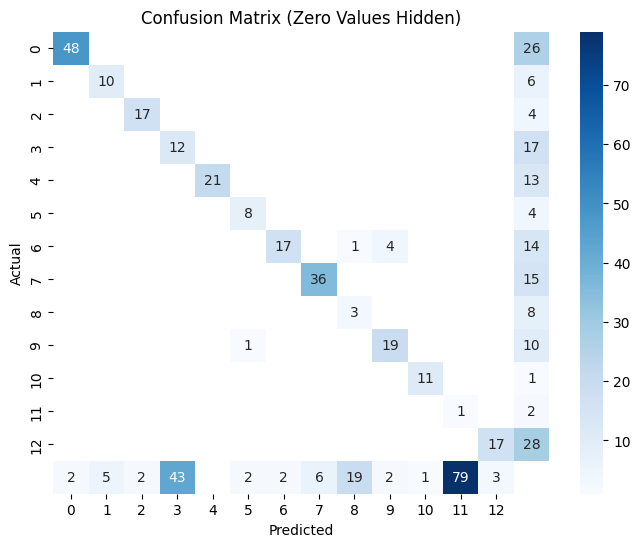

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the confusion matrix
cm = test_results.confusion_matrix.matrix

# Ensure cm is a NumPy array
cm = np.array(cm)

# Create a mask to hide zero values
mask = cm == 0

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=test_results.names,
            yticklabels=test_results.names, mask=mask, linewidths=0, linecolor='gray')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Zero Values Hidden)")
plt.show()


In [43]:
import numpy as np
import pandas as pd

# Extract the confusion matrix
cm = test_results.confusion_matrix.matrix

# Ensure cm is a NumPy array
cm = np.array(cm)

# Compute per-class accuracy
class_accuracy = np.diag(cm) / cm.sum(axis=1)  # True Positives / Total Samples in Class

# Store results in a dictionary
accuracy_results = {
    test_results.names[i]: f"{class_accuracy[i] * 100:.2f}" if not np.isnan(class_accuracy[i]) else "0.00"
    for i in range(len(test_results.names))
}

# Convert to DataFrame for better readability
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Class", "Accuracy (%)"])

# Calculate average accuracy
avg_accuracy = accuracy_df["Accuracy (%)"].astype(float).mean()

# Display accuracy table
print(accuracy_df)
print(f"\n\033[1mAverage Accuracy: {avg_accuracy:.2f}%\033[0m")


               Class Accuracy (%)
0           Aircraft        64.86
1         Camouflage        62.50
2              Drone        80.95
3               Fire        41.38
4            Grenade        61.76
5           Hand-Gun        66.67
6              Knife        47.22
7   Military-Vehicle        70.59
8            Missile        27.27
9             Pistol        63.33
10             Rifle        91.67
11             Smoke        33.33
12           Soldier        37.78

Average Accuracy: 57.64%
